In [5]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
# Nhập các hằng số sau khi bạn đã cập nhật config.py lên 256x256
from config import IMG_WIDTH, IMG_HEIGHT, OUTPUT_DIR, MODEL_FILE

Đang tải mô hình từ: output\mesonet_binary_detector.h5
Tải mô hình thành công.

Bắt đầu xử lý ảnh ca87aea3-b260-4afb-8bbd-09070e418320.jpg (256x256)...
--------------------------------------------------
Kết quả Dự đoán cho: ca87aea3-b260-4afb-8bbd-09070e418320.jpg
Xác suất REAL: 88.0710%
Xác suất FAKE: 11.9290%
--------------------------------------------------
PHÂN LOẠI CUỐI CÙNG: REAL (Độ tin cậy: 88.07%)
--------------------------------------------------


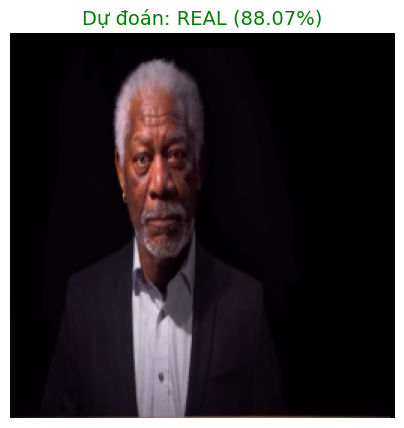

In [6]:


# --- 1. Cấu hình ---
MODEL_PATH = os.path.join(OUTPUT_DIR, MODEL_FILE)

# <<< THAY THẾ BẰNG ĐƯỜNG DẪN THỰC TẾ CỦA FILE ẢNH BẠN MUỐN TEST >>>
# Ví dụ: Nếu ảnh nằm cùng thư mục AI Train:
IMAGE_PATH = r'C:\Users\ADMIN\AI Train\Test\ca87aea3-b260-4afb-8bbd-09070e418320.jpg' 

# --- 2. Tải Mô hình ---
try:
    print(f"Đang tải mô hình từ: {MODEL_PATH}")
    model = tf.keras.models.load_model(MODEL_PATH)
    print("Tải mô hình thành công.")
except Exception as e:
    print(f"LỖI: Không thể tải mô hình. Đảm bảo bạn đã huấn luyện lại với 256x256 và mô hình đã được lưu đúng.")
    print(f"Chi tiết lỗi: {e}")
    exit()

# --- 3. Tải và Tiền xử lý Ảnh ---
print(f"\nBắt đầu xử lý ảnh {os.path.basename(IMAGE_PATH)} ({IMG_WIDTH}x{IMG_HEIGHT})...")
try:
    # Đọc ảnh (OpenCV đọc dưới dạng BGR)
    image = cv2.imread(IMAGE_PATH)
    
    # KIỂM TRA LỖI ĐỌC FILE (Khắc phục lỗi trước đó)
    if image is None:
        raise FileNotFoundError(f"OpenCV không đọc được ảnh. Vui lòng kiểm tra đường dẫn: {os.path.abspath(IMAGE_PATH)}")
        
    # Resize ảnh về kích thước mô hình mong muốn (256x256)
    # Nếu ảnh đã là 256x256, hàm này chỉ xác nhận lại kích thước.
    image_resized = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Chuẩn hóa (0-1) và thêm chiều batch
    input_array = np.asarray(image_resized, dtype=np.float32) / 255.0
    input_tensor = np.expand_dims(input_array, axis=0)
    
    # --- 4. Dự đoán ---
    prediction = model.predict(input_tensor, verbose=0)[0]
    
    # prediction là [Xác suất REAL, Xác suất FAKE]
    real_prob = prediction[0]
    fake_prob = prediction[1]
    
    # 5. Kết quả
    label = "REAL" if real_prob > fake_prob else "FAKE"
    prob = max(real_prob, fake_prob)
    
    # Màu hiển thị
    color_plt = "green" if label == "REAL" else "red"
    
    # 6. Hiển thị Kết quả và Ảnh
    print("-" * 50)
    print(f"Kết quả Dự đoán cho: {os.path.basename(IMAGE_PATH)}")
    print(f"Xác suất REAL: {real_prob*100:.4f}%")
    print(f"Xác suất FAKE: {fake_prob*100:.4f}%")
    print("-" * 50)
    print(f"PHÂN LOẠI CUỐI CÙNG: {label} (Độ tin cậy: {prob*100:.2f}%)")
    print("-" * 50)

    # Hiển thị ảnh
    plt.figure(figsize=(5, 5))
    # Chuyển từ BGR (OpenCV) sang RGB (Matplotlib)
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Dự đoán: {label} ({prob*100:.2f}%)", color=color_plt, fontsize=14)
    plt.axis('off')
    plt.show()

except FileNotFoundError as e:
    print(f"LỖI QUAN TRỌNG: {e}")
except Exception as e:
    print(f"Lỗi không xác định khi xử lý ảnh hoặc mô hình: {e}")